# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [48]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached bokeh-2.0.1.tar.gz (8.6 MB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [49]:
!pip install autogluon --no-cache-dir

### Setup Kaggle API Key

In [50]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [51]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "akanbigloryinioluwa"
kaggle_key = "6bb781d43516a5518222d472f1569d4a"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [52]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [53]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [54]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv", parse_dates=["datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [55]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [56]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv", parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [57]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [58]:
predictor = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train_data=train.drop(['casual', 'registered'], axis=1),
    time_limit=600, #10 minutes
    presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20250829_185412"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.63 GB / 12.67 GB (83.9%)
Disk Space Avail:   63.03 GB / 107.72 GB (58.5%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the opti

### Review AutoGluon's training run with ranking of models that did the best.

In [59]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3 -115.307374  root_mean_squared_error      16.575576  371.724354                0.000895           0.042233            3       True          9
1         LightGBM_BAG_L2 -115.839577  root_mean_squared_error      14.954285  280.796024                0.103496          39.478408            2       True          7
2       LightGBMXT_BAG_L2 -115.977441  root_mean_squared_error      15.312517  282.690268                0.461728          41.372652            2       True          6
3  RandomForestMSE_BAG_L1 -116.548359  root_mean_squared_error       0.635337   20.852789                0.635337          20.852789            1       True          3
4     WeightedEnsemble_L2 -116.548359  root_mean_squared_error       0.636281   20.875369         

{'model_types': {'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMXT_BAG_L1': np.float64(-131.46090891834504),
  'LightGBM_BAG_L1': np.float64(-131.054161598899),
  'RandomForestMSE_BAG_L1': np.float64(-116.54835939455667),
  'CatBoost_BAG_L1': np.float64(-131.42601450032976),
  'WeightedEnsemble_L2': np.float64(-116.54835939455667),
  'LightGBMXT_BAG_L2': np.float64(-115.97744065038533),
  'LightGBM_BAG_L2': np.float64(-115.83957749102134),
  'RandomForestMSE_BAG_L2': np.float64(-118.34104023367911),
  'WeightedEnsemble_L3': np.float64(-115.307374

### Create predictions from test dataset

In [60]:
predictions = predictor.predict(test)
predictions.head()

,count
0,95.759880
1,99.840919
2,99.840919
3,98.042877
4,98.042877


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [61]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

,count
count,6493.000000
mean,221.511505
std,126.657295
min,17.774029
25%,124.132835
50%,197.841278
75%,304.898102
max,626.698792


In [62]:
# How many negative values do we have?
predictions[predictions < 0].count()

np.int64(0)

In [63]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [64]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [65]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 722kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [66]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission.csv               2025-08-29 19:05:27.160000  first raw submission               SubmissionStatus.PENDING                              
submission_new_hpo.csv       2025-08-29 17:06:30.173000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.48347      0.48347       
submission_new_features.csv  2025-08-29 16:43:20.570000  new features                       SubmissionStatus.COMPLETE  0.49792      0.49792       
submission.csv               2025-08-29 16:06:07.353000  first raw submission               SubmissionStatus.COMPLETE  1.43160      1.43160       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

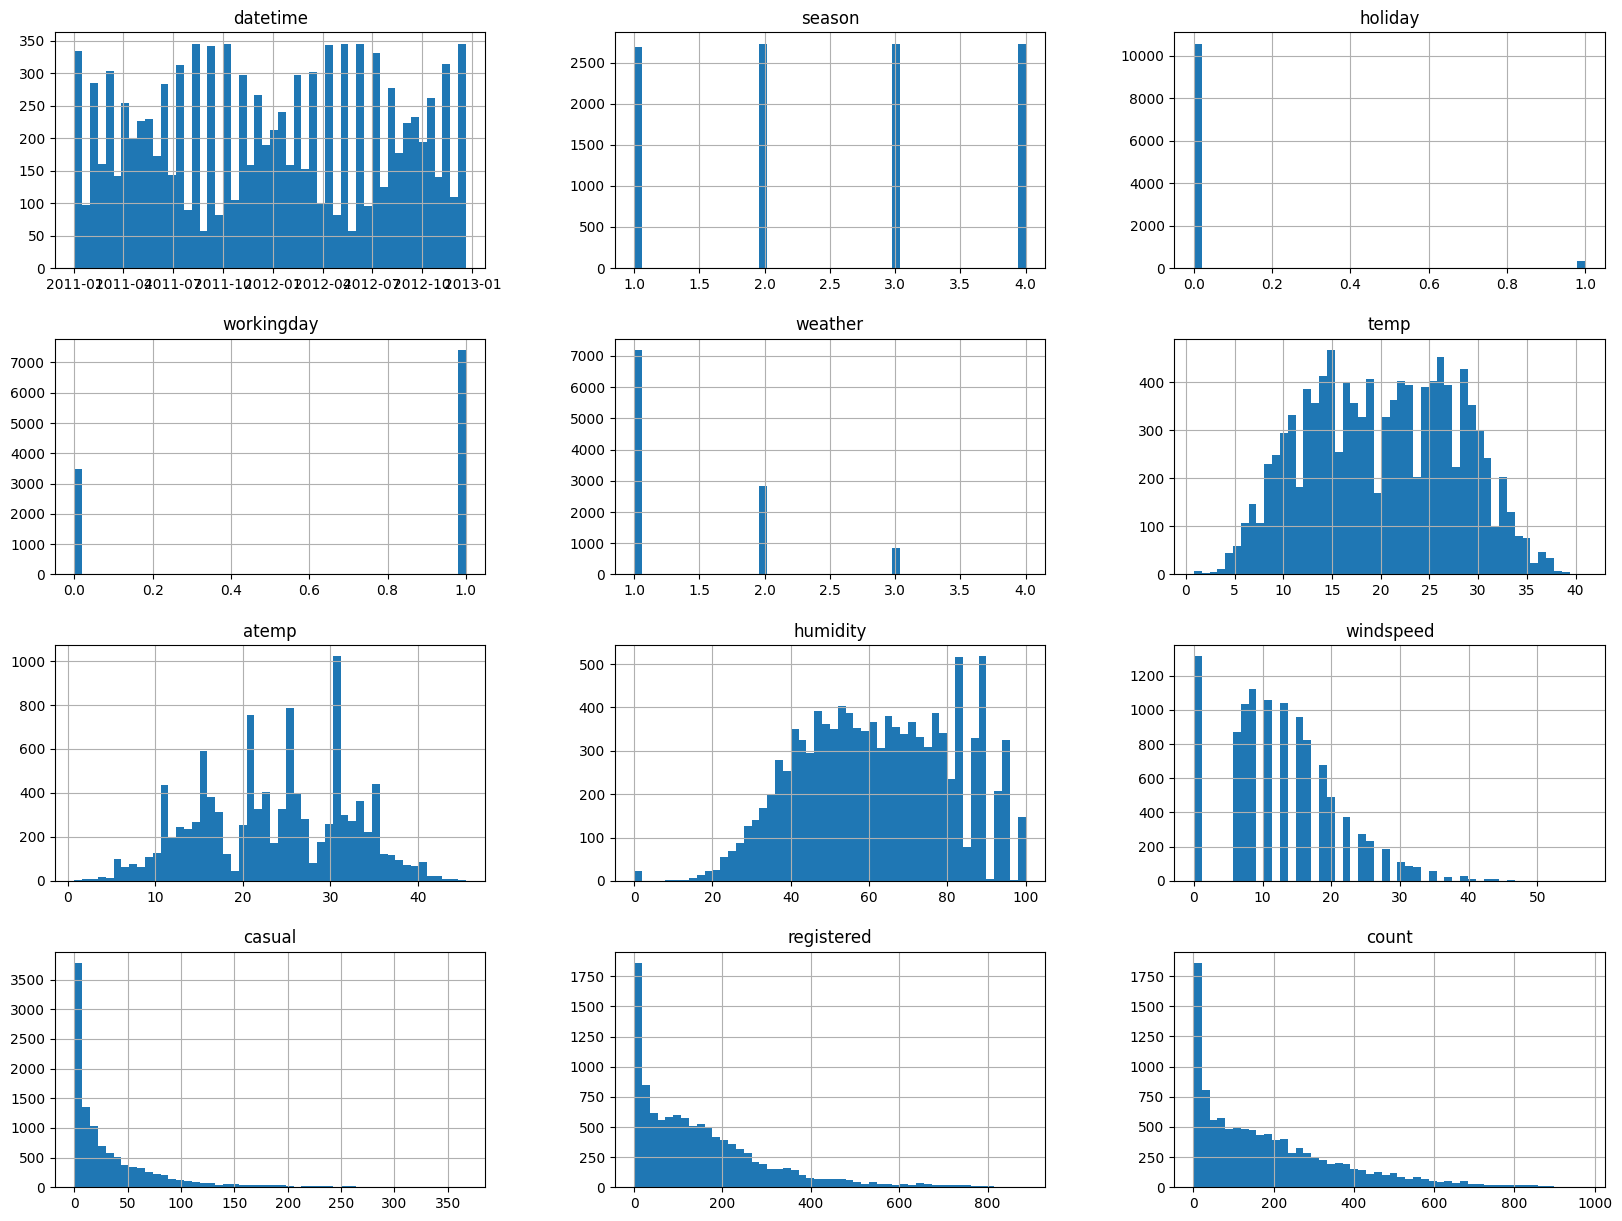

In [67]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(bins=50, figsize=(20,15))

In [68]:
# create a new feature

train['holiday_or_weekend'] = ((train['holiday'] == 1) | (train['workingday'] == 0)).astype(int)
test['holiday_or_weekend'] = ((test['holiday'] == 1) | (test['workingday'] == 0)).astype(int)

train ['temp_atemp_diff'] = train_new['temp'] - train_new['atemp']
test ['temp_atemp_diff'] = test_new['temp'] - test_new['atemp']

#Get the range of wind condititon in which people will ride bike
train ['ideal_windspeed'] = ((train['windspeed'] >= 5) & (train['windspeed'] <= 10)).astype("category")
test ['ideal_windspeed'] = ((test['windspeed'] >= 5) & (test['windspeed'] <= 10)).astype("category")

# create new feature that uses windspeed to categories whether it's windy
train['is_windy'] = (train['windspeed'] > 30).astype("category")
test['is_windy'] = (test['windspeed'] > 30).astype("category")

train ['humidity_temp_ratio'] = train['humidity'] / (train['temp']+ 1e-6)
test ['humidity_temp_ratio'] = test['humidity'] / (test['temp']+ 1e-6)



train ["season"] = train["season"].astype("category")
train ["weather"] = train["weather"].astype("category")
test["season"] =  test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

train['hourly'] = train["datetime"].dt.hour
test['hourly'] = test["datetime"].dt.hour

train ['minute'] = train["datetime"].dt.minute
test ['minute'] = test["datetime"].dt.minute

train['day'] = train["datetime"].dt.day
test['day'] = test["datetime"].dt.day

train ['month'] = train["datetime"].dt.month
test['month'] = test["datetime"].dt.month

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [69]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] =  test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [70]:
# View are new feature
train.tail(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,count,holiday_or_weekend,temp_atemp_diff,ideal_windspeed,is_windy,humidity_temp_ratio,hourly,minute,day,month
10876,2012-12-19 14:00:00,4,0,1,1,17.22,21.210,50,12.9980,33,...,218,0,-3.990,False,False,2.903600,14,0,19,12
10877,2012-12-19 15:00:00,4,0,1,1,17.22,21.210,50,19.0012,28,...,237,0,-3.990,False,False,2.903600,15,0,19,12
10878,2012-12-19 16:00:00,4,0,1,1,17.22,21.210,50,23.9994,37,...,334,0,-3.990,False,False,2.903600,16,0,19,12
10879,2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,26,...,562,0,-4.055,False,False,3.048780,17,0,19,12
10880,2012-12-19 18:00:00,4,0,1,1,15.58,19.695,50,23.9994,23,...,569,0,-4.115,False,False,3.209242,18,0,19,12
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,...,336,0,-4.115,False,False,3.209242,19,0,19,12
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,...,241,0,-2.665,False,False,3.861788,20,0,19,12
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,...,168,0,-1.970,False,False,4.375896,21,0,19,12
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,...,129,0,-3.485,True,False,4.375896,22,0,19,12
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,...,88,0,-3.545,True,False,5.030487,23,0,19,12


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'holiday_or_weekend'}>,
        <Axes: title={'center': 'temp_atemp_diff'}>],
       [<Axes: title={'center': 'humidity_temp_ratio'}>,
        <Axes: title={'center': 'hourly'}>,
        <Axes: title={'center': 'minute'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'month'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

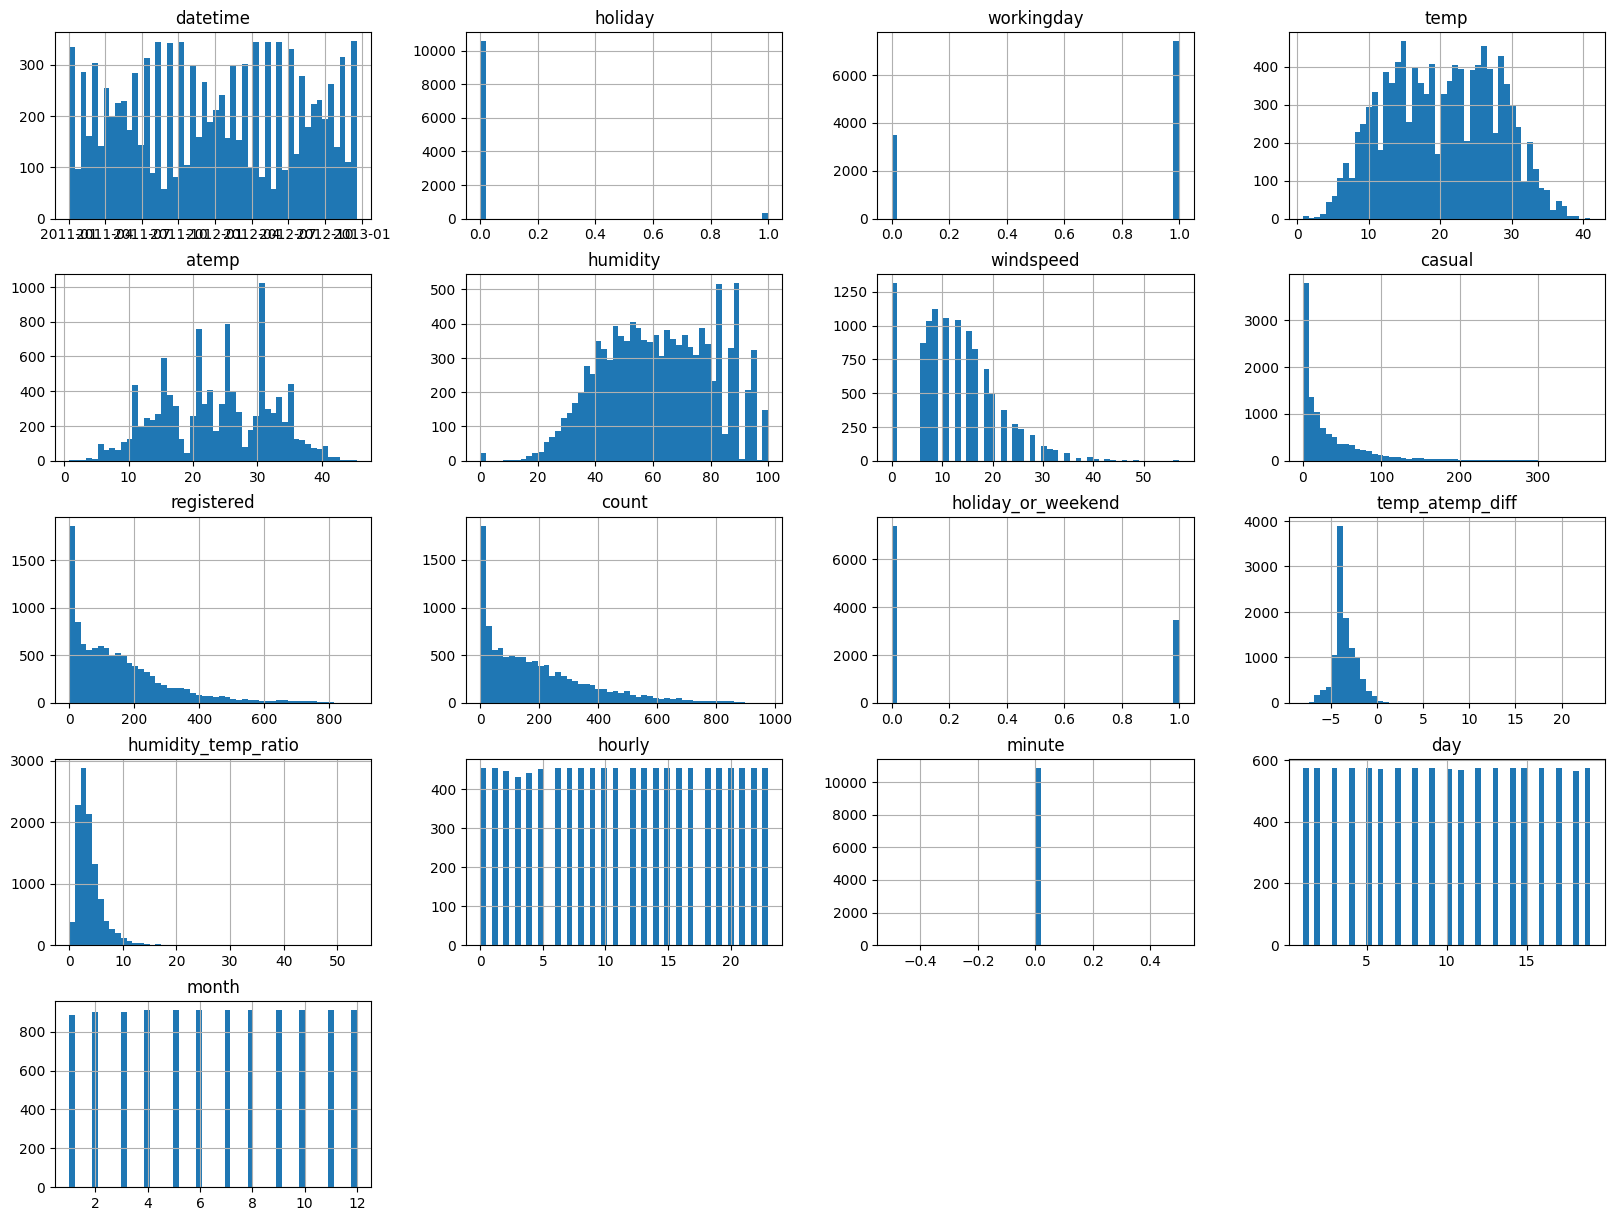

In [71]:
# View histogram of all features again now with the hour feature
train.hist(bins=50, figsize=(20,15))

## Step 5: Rerun the model with the same settings as before, just with more features

In [72]:
#predictor_new_features = TabularPredictor(label='count', error='mean squared error').fit(train_data=train.drop(['casual', 'registered']
predictor_new_features = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train_data=train.drop(['casual', 'registered'], axis=1),
    time_limit=600,
    presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20250829_190536"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.31 GB / 12.67 GB (81.3%)
Disk Space Avail:   62.36 GB / 107.72 GB (57.9%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the opti

In [73]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3 -32.877000  root_mean_squared_error      31.612945  365.048543                0.000677           0.028198            3       True          9
1     WeightedEnsemble_L2 -33.014877  root_mean_squared_error      29.881112  234.501798                0.000842           0.022703            2       True          5
2         LightGBM_BAG_L2 -33.589235  root_mean_squared_error      30.846234  306.394578                0.775237          43.942924            2       True          7
3  RandomForestMSE_BAG_L2 -33.909689  root_mean_squared_error      30.837031  321.077420                0.766033          58.625767            2       True          8
4         LightGBM_BAG_L1 -34.254615  root_mean_squared_error       5.445327   73.552287               

{'model_types': {'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMXT_BAG_L1': np.float64(-35.55407790235054),
  'LightGBM_BAG_L1': np.float64(-34.254615109643005),
  'RandomForestMSE_BAG_L1': np.float64(-38.815162758307636),
  'CatBoost_BAG_L1': np.float64(-54.50256000993008),
  'WeightedEnsemble_L2': np.float64(-33.014876630114784),
  'LightGBMXT_BAG_L2': np.float64(-34.268244361547474),
  'LightGBM_BAG_L2': np.float64(-33.58923519470988),
  'RandomForestMSE_BAG_L2': np.float64(-33.90968892043002),
  'WeightedEnsemble_L3': np.float64(-32.876999987

In [74]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features[predictions_new_features < 0] = 0

In [75]:
# Same submitting predictions
submission_new_features = submission.copy()
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [76]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 746kB/s]
Successfully submitted to Bike Sharing Demand

In [77]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-08-29 19:17:38.483000  new features                       SubmissionStatus.COMPLETE  0.50036      0.50036       
submission.csv               2025-08-29 19:05:27.160000  first raw submission               SubmissionStatus.COMPLETE  1.43295      1.43295       
submission_new_hpo.csv       2025-08-29 17:06:30.173000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.48347      0.48347       
submission_new_features.csv  2025-08-29 16:43:20.570000  new features                       SubmissionStatus.COMPLETE  0.49792      0.49792       


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [78]:
#from pickle import FALSE
#he learning rate,η, is usually set to a lower value (between 0.001 to 0.01) to
#allow the algorithm to more gradually compensate for its mistakes. Lower values of learning rate typically result in a more conservative model that takes longer to train but generalizes better to new data.
hyperparameters = {
    'XGB': {
        'n_estimators': 100,
        'max_depth': 10,
        'learning_rate': 0.01,
        'subsample': 0.8,
        'colsample_bytree': 0.9,
    },
    'GBM': [
        {}, {
            'extra_trees': True } ],
    'CAT': {},
}

# Define hyperparameter tuning configuration
hyperparameter_tune_kwargs = {
    'num_trials': 10,                # Total HPO trials
    'scheduler': 'local',            # Use local scheduler
    'searcher': 'random'             # Can also be 'bayesopt' or 'grid'
}

# Train with tuning

predictor_new_hpo = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train_data=train.drop(['casual', 'registered'], axis=1),
    time_limit=600,
    presets='best_quality', raise_on_no_models_fitted= False, hyperparameters= hyperparameters, hyperparameter_tune_kwargs= hyperparameter_tune_kwargs)

No path specified. Models will be saved in: "AutogluonModels/ag-20250829_191740"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.25 GB / 12.67 GB (80.9%)
Disk Space Avail:   61.70 GB / 107.72 GB (57.3%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.12%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-34.2555	 = Validation score   (-root_mean_squared_error)
	73.85s	 = Training   runtime
	4.63s	 = Validation runtime
Hyperparameter tuning model: LightGBMXT_BAG_L1 ... Tuning model for up to 59.9s of the 325.49s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L1/T1 ...
	-48.7548	 = Validation score   (-root_mean_squared_error)
	47.1s	 = Training   runtime
	1.02s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L1 ... Tuning model for up to 59.9s of the 278.31s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=4.01%)
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	-39.0241	 = Validation score   (-root_mean_squared_error)
	69.72s	 = Training   runtime
	0.19s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L1 ... Tuning model for up to 59.9s of the 208.5s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.65%)
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	-36.0537	 = Validation score   (-root_mean_squared_error)
	35.45s	 = Training   runtime
	0.44s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 172.96s of remaining time.
	Ensemble Weights: {'LightGBM_BAG_L1/T1': 0.632, 'XGBoost_BAG_L1/T1': 0.263, 'CatBoost_BAG_L1/T1': 0.105}
	-33.6279	 = Validation score   (-root_mean_squared_error)
	0.03s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting 4 L2 models, fit_strategy="sequential" ...
Hyperparameter tuning model: LightGBM_BAG_L2 ... Tuning model for up to 38.9s of the 172.89s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.14%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-34.3868	 = Validation score   (-root_mean_squared_error)
	51.34s	 = Training   runtime
	0.14s	 = Validation runtime
Hyperparameter tuning model: LightGBMXT_BAG_L2 ... Tuning model for up to 38.9s of the 121.44s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.12%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L2/T1 ...
	-34.8624	 = Validation score   (-root_mean_squared_error)
	46.74s	 = Training   runtime
	0.51s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L2 ... Tuning model for up to 38.9s of the 74.6s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=4.07%)
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	-34.144	 = Validation score   (-root_mean_squared_error)
	52.26s	 = Training   runtime
	0.17s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L2 ... Tuning model for up to 38.9s of the 22.26s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.78%)
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L2/T1 ...
	-35.5431	 = Validation score   (-root_mean_squared_error)
	39.22s	 = Training   runtime
	0.23s	 = Validation runtime
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.00s of the -17.05s of remaining time.
	Ensemble Weights: {'LightGBM_BAG_L1/T1': 0.5, 'XGBoost_BAG_L1/T1': 0.188, 'CatBoost_BAG_L2/T1': 0.125, 'CatBoost_BAG_L1/T1': 0.062, 'LightGBMXT_BAG_L2/T1': 0.062, 'XGBoost_BAG_L2/T1': 0.062}
	-33.5781	 = Validation score   (-root_mean_squared_error)
	0.04s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 417.73s ... Best model: WeightedEnsemble_L3 | Estimated inference throughput: 189.3 rows/s (1361 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/AutogluonModels/ag-20250

In [79]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3 -33.578121  root_mean_squared_error       7.190740  364.388124                0.000943           0.036943            3       True         10
1   WeightedEnsemble_L2 -33.627865  root_mean_squared_error       5.261448  179.052130                0.000904           0.032898            2       True          5
2    CatBoost_BAG_L2/T1 -34.143958  root_mean_squared_error       6.450464  278.384270                0.174293          52.262122            2       True          8
3    LightGBM_BAG_L1/T1 -34.255535  root_mean_squared_error       4.634523   73.850288                4.634523          73.850288            1       True          1
4    LightGBM_BAG_L2/T1 -34.386750  root_mean_squared_error       6.417088  277.463703                0.140917   

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L2/T1': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': np.float64(-34.255535288471776),
  'LightGBMXT_BAG_L1/T1': np.float64(-48.75484246657853),
  'CatBoost_BAG_L1/T1': np.float64(-39.02412834086193),
  'XGBoost_BAG_L1/T1': np.float64(-36.05368131274616),
  'WeightedEnsemble_L2': np.float64(-33.627865044056456),
  'LightGBM_BAG_L2/T1': np.float64(-34.38675030064971),
  'LightGBMXT_BAG_L2/T1': np.float64(-34.86236947760759),
  'CatBoost_BAG_L2/T1': np.fl

In [80]:
# Remember to set all negative values to zero
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo[predictions_new_hpo < 0] = 0

In [81]:
# Same submitting predictions
submission_new_hpo = submission.copy()
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [82]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 699kB/s]
Successfully submitted to Bike Sharing Demand

In [83]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-08-29 19:28:17.693000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.49365      0.49365       
submission_new_features.csv  2025-08-29 19:17:38.483000  new features                       SubmissionStatus.COMPLETE  0.50036      0.50036       
submission.csv               2025-08-29 19:05:27.160000  first raw submission               SubmissionStatus.COMPLETE  1.43295      1.43295       
submission_new_hpo.csv       2025-08-29 17:06:30.173000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.48347      0.48347       


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

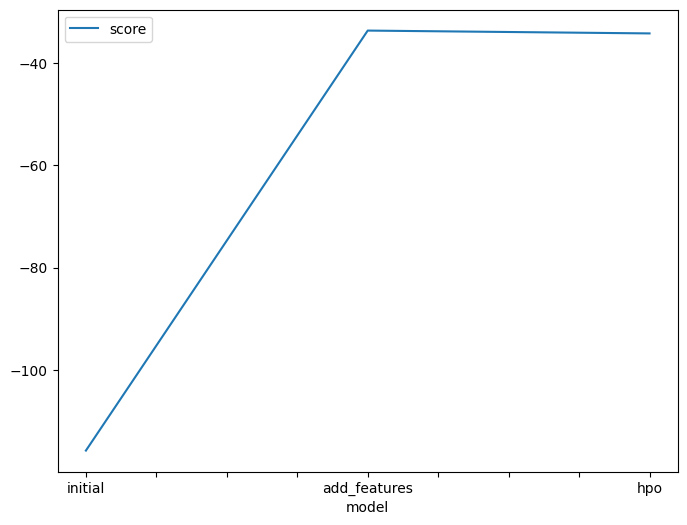

In [87]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-115.839577, -33.589235, -34.143958]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

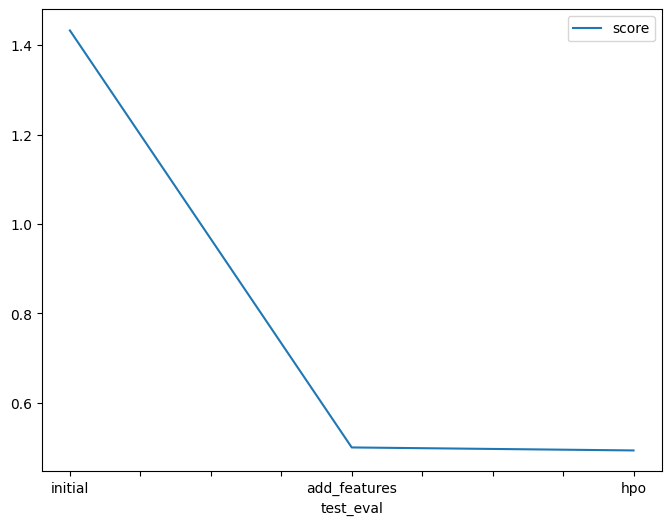

In [89]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.43295 ,0.50036 , 0.49365 ]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [86]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [?, ?, ?],
    "hpo2": [?, ?, ?],
    "hpo3": [?, ?, ?],
    "score": [1.43160,0.49792 , 0.48347]
})

SyntaxError: invalid syntax (ipython-input-1978258756.py, line 4)